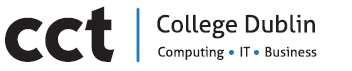


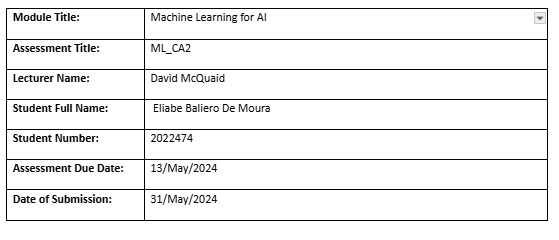

# Table of Contents

- [Introduction](#Introduction) 
- [Checking Dataset](#Checking-Dataset) 
- [Checking Shape](#Checking-Shape) 

     - [](#) 
     - [Cleaning Dataset](#Cleaning-Dataset) 
     - [Checking Duplicated Rows](#Checking-Duplicated-Rows) 
     - [Dropping duplicated Rows](#Dropping-duplicated-Rows)
     - [ Convert Categoricals](#Convert-Categoricals)
     
     - [Convert to Lower Case](#Convert-to-Lower-Case) 
     - [Remove Spaces](#Remove-Spaces) 
     - [Checking Null](#Checking-Null)
     - [Indentify-Outliers](#Indentify-Outliers) 
     - [Histogram](#Histogram) 
     - [Define Columns Outliers](#Define-Columns-Outliers) 
     - [Eliminating Outliers](#Eliminating-Outliers)

     - [](#) 
     - [Create a Validation Dataset](#Create-a-Validation-Dataset) 
     - [Target Variable](#Target-Variable) 
     - [Bulding Model ](#Bulding-Model ) 
     - [Calculate metrics for LSTM](#Calculate-metrics-for-LSTM) 
     - [Train Random Forest Regressor](#Train-Random-Forest-Regressor) 
     - [Evaluate-Models](#Evaluate-Model-RF) 
     - [](#)
 
  - [Semantic Analysis](#Semantic-Analysis) 
     - [Data Preprocessing](#Data-Preprocessing) 
     - [Text Preprocessing](#Text-Preprocessing) 
     - [Apply Train Test Split](#Apply-Train-Test-Split) 
     - [Add different layers](#Add-different-layers) 
     - [Evaluation of Model](#Evaluation-of-Model)
     - [onclusion](#onclusion) 
- [References](#References) 8


# Introduction

In [66]:

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### Checking Dataset

In [88]:
df = pd.read_csv('BankRecords.csv')
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


### Checking Shape

In [89]:
df.shape # First "How many observations(rows) and how many features (columns)"

(5000, 14)

Check data type of each feature

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [91]:
df.describe()  

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


# Cleaning Dataset 


"Data preparation and cleaning enhances dataset quality" Kartikay Goyle (2023)
.Thinking that, our approach begins with thorough data preprocessing, which 
involves addressing missing values, outliers, and inconsistencies to achieve our goals. 

### Checking Duplicated Rows 

In [92]:
duplicates = df.duplicated()
print("\nDuplicate Rows:")
print(df[duplicates])
df.shape


Duplicate Rows:
Empty DataFrame
Columns: [ID, Age, Experience(Years), Income(Thousands's), Sort Code, Family, Credit Score, Education, Mortgage(Thousands's), Personal Loan, Securities Account, CD Account, Online Banking, CreditCard]
Index: []


(5000, 14)

### Dropping duplicated Rows
We do not need to drop , as there is not duplicatedes rows

In [93]:
#df = df.drop_duplicates()
#df

### Convert Categoricals

In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


columns_to_convert = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']

# Convert 'Yes'/'No' columns to numerical, assuming NaN means 'No' (0)
for col in columns_to_convert:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    df[col].fillna(0, inplace=True)
    df[col] = df[col].astype(int)

# Encoding the 'Education' column
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])


# Display the transformed DataFrame
#df = pd.get_dummies(df, columns=['Education'])

df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,0,1


### Convert to Lower Case
Convert all string values to lower case

In [95]:
df.columns = df.columns.str.lower()


### Remove Spaces
Remove extra white spaces from all string columns

In [96]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Checking Null
Checking any null/na in my data

In [97]:
df.isnull().sum()
#df.fillna('')

id                       0
age                      0
experience(years)        0
income(thousands's)      0
sort code                0
family                   0
credit score             0
education                0
mortgage(thousands's)    0
personal loan            0
securities account       0
cd account               0
online banking           0
creditcard               0
dtype: int64

### Indentify Outliers

Check boxplot to see outliers 

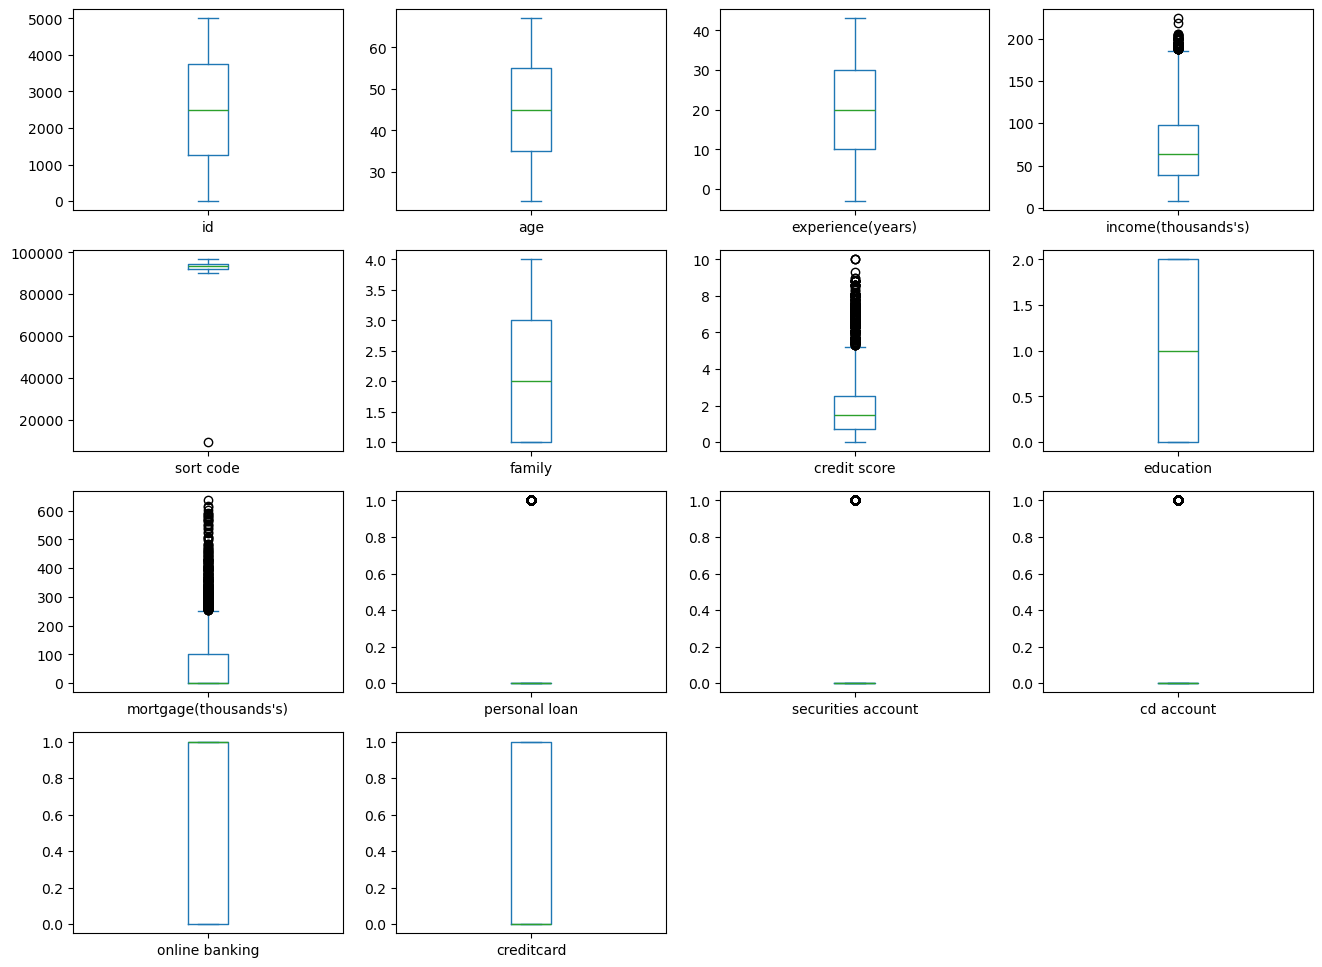

(5000, 14)

In [98]:
import matplotlib.pyplot as plt
df.groupby('age').size()
# Plot the box plot with directly specified figure size
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(16, 12))

# Show the plot
plt.show()
df.shape

### Histogram
Histogram of each input variable to see distribution

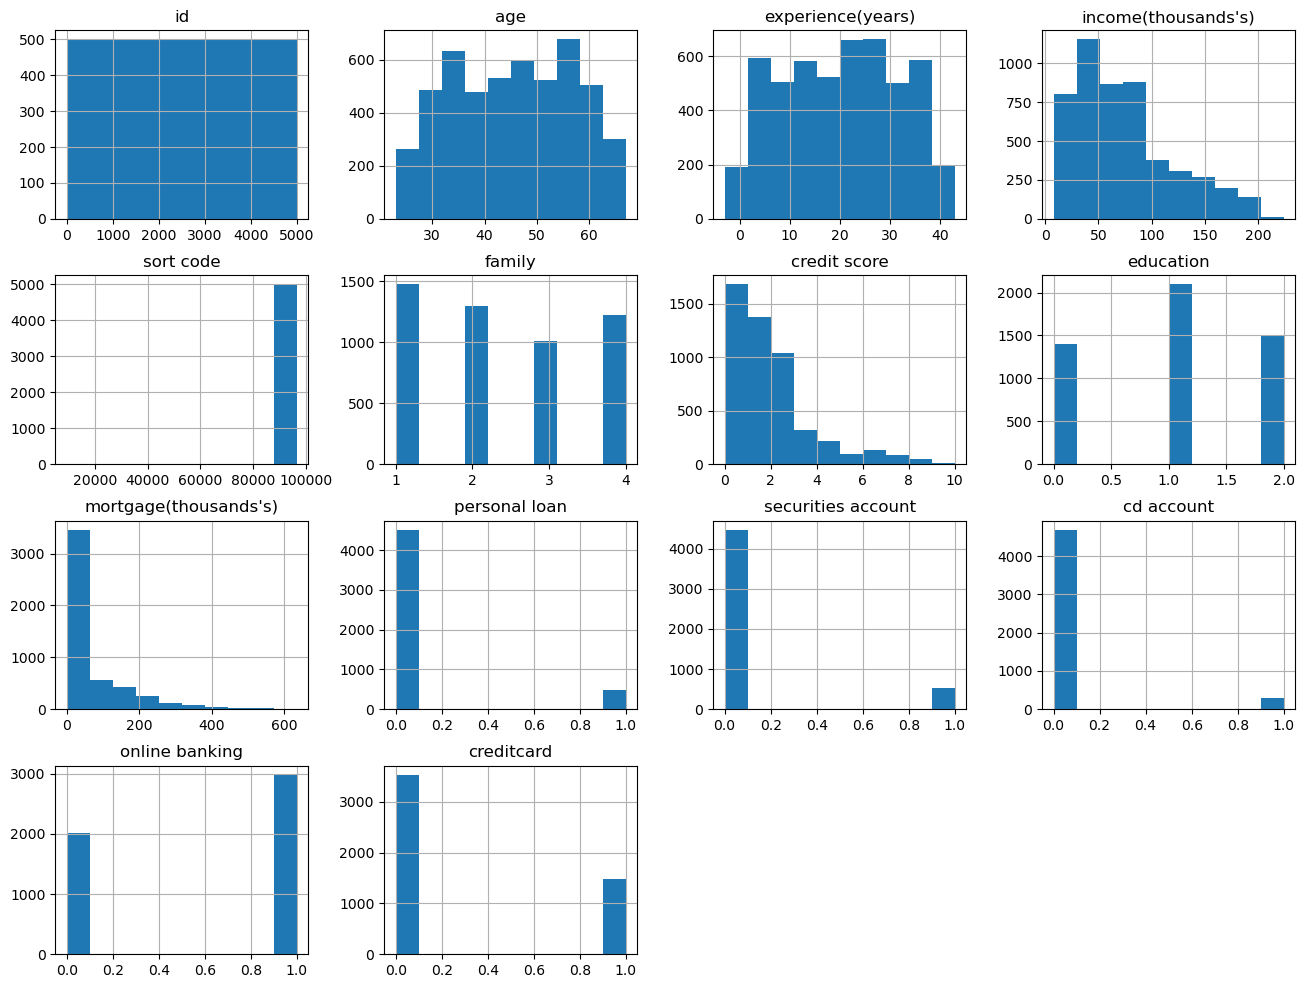

In [99]:
fig, ax = plt.subplots(figsize=(16, 12))  # Adjust the width and height as needed

# Plot the histogram
df.hist(ax=ax)

# Show the plot
plt.show()

In [100]:
df

,id,age,experience(years),income(thousands's),sort code,family,credit score,education,mortgage(thousands's),personal loan,securities account,cd account,online banking,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,2,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,2,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,0,1,0


### Define Columns Outliers 
Define columns outliers 
Define the columns you want to check for outliers

In [101]:
import pandas as pd
import numpy as np

# Define the function to calculate lower and upper bounds
def remove_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    lwr_bound = Q1 - 1.5 * IQR
    upr_bound = Q3 + 1.5 * IQR
    
    return lwr_bound, upr_bound

# List of columns to process
columns_to_process = ["Income(Thousands's)","Credit Score", "Mortgage(Thousands's)"]
df.shape


(5000, 14)

### Eliminating Outliers

(5000, 14)


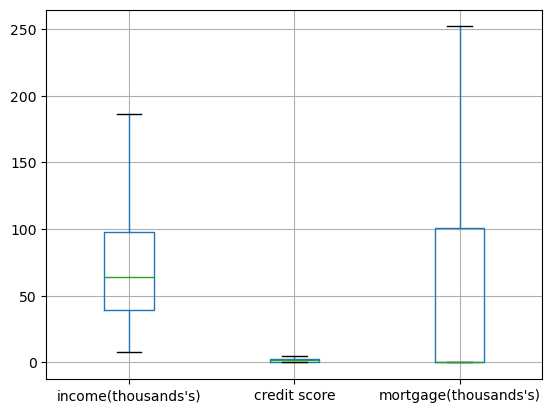

In [102]:
# List of columns to process
columns_to_process = ["income(thousands's)", "credit score", "mortgage(thousands's)"]

# Store original dtypes
original_dtypes = df[columns_to_process].dtypes

# Apply the outlier removal and capping for each column
for column in columns_to_process:
    low, high = remove_outlier(df[column])
    df[column] = np.where(df[column] > high, high, df[column])
    df[column] = np.where(df[column] < low, low, df[column])

# Restore original dtypes, as we eliminate outliers , some data type become float so we will return it to int
for column in columns_to_process:
    if np.issubdtype(original_dtypes[column], np.integer):
        df[column] = df[column].astype(int)

# Plot boxplot for each column
df.boxplot(column=columns_to_process)

# Print the shape of the DataFrame
print(df.shape)

Put "isFraud" column to be the last column, to make easir to me split it in x and y

In [103]:
# Assuming df is your DataFrame containing the data
# Drop the "income(thousands's)" column and save it separately
incomethousands = df.pop("education")

# Append the isFraud column to the DataFrame as the last column
df["education"] = incomethousands

df.head()

,id,age,experience(years),income(thousands's),sort code,family,credit score,mortgage(thousands's),personal loan,securities account,cd account,online banking,creditcard,education
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0


### Create a Validation Dataset

Now we will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.


### Target Variable
Target Variable and Split the data into training and testing sets

In [104]:
df.head()

,id,age,experience(years),income(thousands's),sort code,family,credit score,mortgage(thousands's),personal loan,securities account,cd account,online banking,creditcard,education
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0


In [105]:
from sklearn.preprocessing import MinMaxScaler
# Features and target variable
X = df.drop(["income(thousands's)"], axis=1)
y = df["income(thousands's)"]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to fit the LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Bulding Model 
Neural Network

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=10, validation_split=0.2)

# Predictions for LSTM
lstm_predictions = model.predict(X_test)
lstm_predictions = np.reshape(lstm_predictions, (lstm_predictions.shape[0],))


Epoch 1/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 66s 17ms/step - loss: 2621.7554 - mae: 40.1012 - val_loss: 1858.5022 - val_mae: 35.0276
Epoch 2/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - loss: 2157.9541 - mae: 37.5613 - val_loss: 1828.5804 - val_mae: 33.9856
Epoch 3/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 2047.9279 - mae: 36.4452 - val_loss: 1864.6857 - val_mae: 35.1294
Epoch 4/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 2083.2180 - mae: 37.1553 - val_loss: 1900.4261 - val_mae: 35.6813
Epoch 5/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 2185.2590 - mae: 37.8230 - val_loss: 1832.4066 - val_mae: 33.9268
Epoch 6/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - loss: 2150.6404 - mae: 37.4105 - val_loss: 1827.5153 - val_mae: 34.2314
Epoch 7/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 2140.3555 - mae: 37.7171 - val_loss: 1841.3575 - val_mae: 34.6764
Epoch 8/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 2195.1426 - mae: 38.0928 -

### Calculate metrics for LSTM

In [107]:
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)

print(f'LSTM Mean Squared Error: {lstm_mse}')
print(f'LSTM R^2 Score: {lstm_r2}')
print(f'LSTM Mean Absolute Error: {lstm_mae}')

LSTM Mean Squared Error: 2163.6030255144374
LSTM R^2 Score: -0.034113985402810965
LSTM Mean Absolute Error: 38.64808135986328


### Train Random Forest Regressor
Traning Random and calculating Metrics 

In [110]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.reshape(X_train.shape[0], X_train.shape[1]), y_train)

# Predictions for Random Forest
rf_predictions = rf.predict(X_test.reshape(X_test.shape[0], X_test.shape[1]))

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Random Forest R^2 Score: {rf_r2}')
print(f'Random Forest Mean Absolute Error: {rf_mae}')

Random Forest Mean Squared Error: 439.1125726
Random Forest R^2 Score: 0.79012210320611
Random Forest Mean Absolute Error: 15.592060000000002


### Evaluate Model RF

In [112]:
rf_comparison_df = pd.DataFrame({"Actual": y_test.values.flatten(), "RF_Predicted": rf_predictions.flatten()})

print("\nRandom Forest Predictions vs Actual:")
print(rf_comparison_df.head(10))  # Print first 20 rows


Random Forest Predictions vs Actual:
   Actual  RF_Predicted
0      35         24.73
1     149        153.98
2     121        122.69
3      62         59.80
4      30         50.59
5      69         77.69
6     128        172.87
7     133        146.27
8      31         37.99
9     129        143.86


Mean Squared Error (MSE):

Random Forest: 439.11
LSTM: 2163.60
Conclusion: The lower MSE of the Random Forest model indicates it has better predictive accuracy with smaller squared prediction errors.
R-squared (R²) Score:

Random Forest: 0.79
LSTM: -0.03
Conclusion: The Random Forest's R² score shows it explains 79% of the variance in the target variable, while the LSTM's negative R² score suggests it performs worse than a simple mean prediction.
Mean Absolute Error (MAE):

Random Forest: 15.59
LSTM: 38.65
Conclusion: The lower MAE of the Random Forest model indicates it has smaller average errors in predictions.
In summary, the Random Forest model is superior, with lower MSE and MAE values and a higher R² score, demonstrating better overall performance.

# Semantic Analysis


### Twitter US Airline Sentiment
Link Dataset: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [113]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Verify TensorFlow installation
print(tf.__version__)

2.16.1


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the File

In [114]:
df = pd.read_csv('Tweets.csv')
df.head() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [115]:
df.shape # First "How many observations(rows) and how many features (columns)"

(14640, 15)

### Drop Columns

In [116]:
# Drop unnecessary columns
columns_to_drop = [
    'tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence',
    'airline_sentiment_gold', 'name', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'
]
df = df.drop(columns=columns_to_drop, axis=1)

# Drop rows with missing values
df.dropna(inplace=True)

# Display the first few rows of the DataFrame to check the remaining columns
df.head()

,airline_sentiment,airline,retweet_count,text,tweet_created
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


### Check Null Values

In [117]:
df.isnull().sum()
#df.fillna('')

airline_sentiment    0
airline              0
retweet_count        0
text                 0
tweet_created        0
dtype: int64

### Creating a Rating Column

In [118]:
df['rating'] = df['airline_sentiment'].apply(lambda x: 3 if x == 'positive' else (2 if x == 'neutral' else 1))
df.head()

,airline_sentiment,airline,retweet_count,text,tweet_created,rating
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,2
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,3
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,2
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,1
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,1


### Plot Rate

<Axes: xlabel='rating', ylabel='count'>

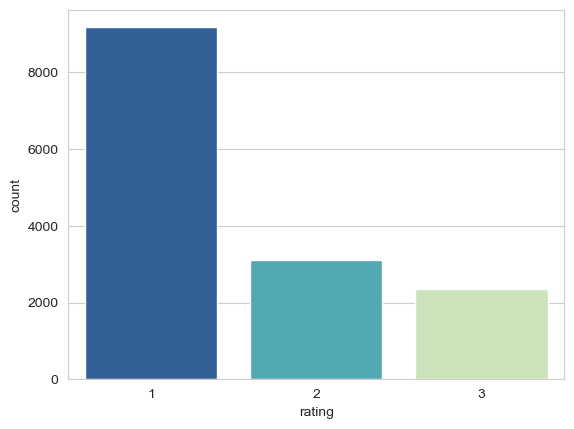

In [119]:
sns.set_style('whitegrid')
sns.countplot(x='rating',data=df, palette='YlGnBu_r')

### Plot the Polarity Sentiment

<Axes: xlabel='airline_sentiment', ylabel='count'>

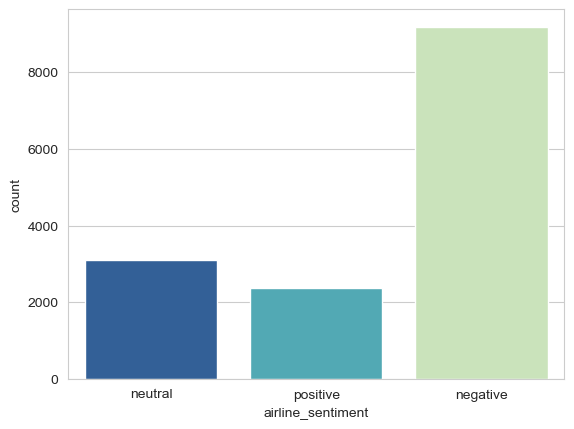

In [120]:
sns.set_style('whitegrid')
sns.countplot(x='airline_sentiment',data=df, palette='YlGnBu_r')

### Data Preprocessing

In [121]:
df_Positive = df[df['airline_sentiment'] == 'positive'][0:4880]
df_Neutral = df[df['airline_sentiment'] == 'neutral']
df_Negative = df[df['airline_sentiment'] == 'negative']

### Sample negative and neutral polarity dataset and create final dataframe

In [122]:
df_Neutral_over = df_Neutral.sample(4880, replace=True)
df_Negative_over = df_Negative.sample(4880, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [123]:
sentiment_counts = df['airline_sentiment'].value_counts()

# Get the count for positive sentiment
positive_count = sentiment_counts.get('positive', 0)

print(f"Number of positive sentiments: {positive_count}")

Number of positive sentiments: 2363


### Text Preprocessing

In [124]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

### Apply the method "get_text_processing" into column  text

In [125]:
df['review'] = df['text'].apply(get_text_processing)

In [126]:
df = df[['review', 'airline_sentiment']]
df.head()

,review,airline_sentiment
1,VirginAmerica plus youve added commercials exp...,positive
6,VirginAmerica yes nearly every time fly VX “ea...,positive
8,virginamerica Well didnt…but,positive
9,VirginAmerica amazing arrived hour early Youre...,positive
11,VirginAmerica lt3 pretty graphics much better ...,positive


### Apply One hot encoding on negative, neutral, and positive

In [127]:
one_hot = pd.get_dummies(df["airline_sentiment"])
df.drop(['airline_sentiment'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,negative,neutral,positive
1,VirginAmerica plus youve added commercials exp...,False,False,True
6,VirginAmerica yes nearly every time fly VX “ea...,False,False,True
8,virginamerica Well didnt…but,False,False,True
9,VirginAmerica amazing arrived hour early Youre...,False,False,True
11,VirginAmerica lt3 pretty graphics much better ...,False,False,True


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12123 entries, 1 to 1618
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    12123 non-null  object
 1   negative  12123 non-null  bool  
 2   neutral   12123 non-null  bool  
 3   positive  12123 non-null  bool  
dtypes: bool(3), object(1)
memory usage: 224.9+ KB


### Apply Train Test Split

In [129]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Apply vectorization

In [130]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

### Apply frequency, inverse document frequency:

In [131]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

### Add different layers

In [132]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

### Fit the Model

In [134]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=10, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 466s 13s/step - accuracy: 0.5455 - loss: 0.8891 - val_accuracy: 0.8243 - val_loss: 0.4761
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 498s 13s/step - accuracy: 0.9404 - loss: 0.1997 - val_accuracy: 0.8389 - val_loss: 0.4906
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 457s 14s/step - accuracy: 0.9838 - loss: 0.0557 - val_accuracy: 0.8323 - val_loss: 0.6778
Epoch 3: early stopping


We can see that accuracy is increasing and loss is decreasing

### Evaluation of Model

In [135]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

57/57 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8333 - loss: 0.6468
Test accuracy: 0.8322793245315552


### Prediction

In [136]:
preds = model.predict(X_test)
preds

114/114 ━━━━━━━━━━━━━━━━━━━━ 102s 892ms/step


array([[3.58162943e-04, 9.99146819e-01, 4.94990265e-04],
       [2.53977312e-04, 5.63454330e-02, 9.43400621e-01],
       [3.27999797e-03, 8.87004316e-01, 1.09715685e-01],
       ...,
       [9.99992847e-01, 6.38243546e-06, 7.36549282e-07],
       [1.32920823e-05, 1.73644498e-01, 8.26342225e-01],
       [9.16453302e-01, 8.03785212e-03, 7.55087957e-02]], dtype=float32)

### Conclusion

Final Evaluation on Test Data
Test Accuracy: 83.23%
Test Loss: 0.6468
Predictions Analysis
The model's predictions on the test set (preds) are probability distributions over three classes, where each row corresponds to the predicted probabilities for a single sample. Here's a brief analysis:

The first prediction is [3.58162943e-04, 9.99146819e-01, 4.94990265e-04], indicating a high probability (approximately 99.91%) for the second class.
The second prediction is [2.53977312e-04, 5.63454330e-02, 9.43400621e-01], showing a high probability (approximately 94.34%) for the third class.
Similarly, other predictions indicate high confidence in one of the classes, with probabilities close to 1 for one class and near 0 for others.
Summary
Training: The model improved rapidly in training accuracy, reaching 98.38% by the third epoch. However, the validation accuracy plateaued around 83%, and validation loss increased in the third epoch, suggesting overfitting.
Early Stopping: The model likely stopped early due to increasing validation loss, indicating it couldn't generalize better with further training.
Test Performance: The model performed well on the test set with an accuracy of 83.23%, consistent with the validation performance.
Predictions: The predictions show high confidence for specific classes, indicating the model's ability to distinguish between classes effectively.

# References

Kartikay Goyle. (2023, p.1) A Machine Learning Approach [Online] Available at:
https://arxiv.org/pdf/2307.07119[Accessed 17 May 2024].

El Naqa and Murphy (2015) What is machine learning? [Online] Available at: 
https://www.researchgate.net/publication/324568763_Machine_Learning_in_Radiation_Oncology_Opportunities_Requirements_and_Needs [Accessed 18 May 2024].

Drew Jamieson (2022) Simple lessons from complex learning: what a neural
network model learns Available at: https://arxiv.org/pdf/2206.04573k

 [Accessed 30 May 2024]..

